In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
data=pd.read_csv('Spend.csv')
data.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [3]:
#df.tail(482)

In [4]:
#df.isnull()

In [5]:
data.isna().sum()

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [7]:
data.describe()

,Amount
count,216960.000000
mean,50090.025108
std,29097.905016
min,10.510000
25%,25061.242500
50%,50183.980000
75%,75080.460000
max,978942.260000


In [8]:
#df.dropna().describe()

In [9]:
df=data.dropna()
data1=data.dropna()

### Feature engineering
#### Assigning numerical value to categorical data 

In [10]:
data1['AccountID'].nunique()

15

In [11]:
print(data1['AccountID'].unique())

['ACC4' 'ACC10' 'ACC8' 'ACC6' 'ACC15' 'ACC9' 'ACC7' 'ACC12' 'ACC2' 'ACC14'
 'ACC1' 'ACC11' 'ACC3' 'ACC5' 'ACC13']


In [12]:
data1['AccountID'].value_counts()

AccountID
ACC15    14701
ACC5     14630
ACC7     14581
ACC2     14553
ACC9     14527
ACC14    14458
ACC4     14456
ACC11    14446
ACC12    14421
ACC13    14421
ACC8     14402
ACC1     14365
ACC10    14362
ACC6     14352
ACC3     14285
Name: count, dtype: int64

In [13]:
account=list(df['AccountID'].unique())
print(account)
ac_l=[]
i=0
for j in account:
    i+=1
    ac_l.append(i)
print(ac_l)

['ACC4', 'ACC10', 'ACC8', 'ACC6', 'ACC15', 'ACC9', 'ACC7', 'ACC12', 'ACC2', 'ACC14', 'ACC1', 'ACC11', 'ACC3', 'ACC5', 'ACC13']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [14]:
df['AccountID'].replace(account,ac_l,inplace=True)

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\3534241231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AccountID'].replace(account,ac_l,inplace=True)


<Axes: xlabel='AccountID', ylabel='count'>

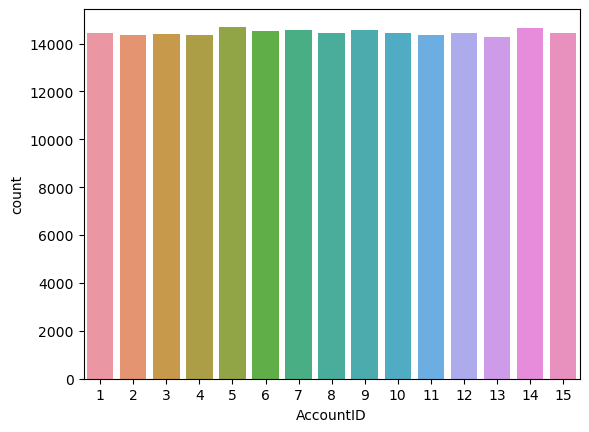

In [15]:
sns.countplot(x='AccountID',data=df)

<Axes: xlabel='AccountID', ylabel='Amount'>

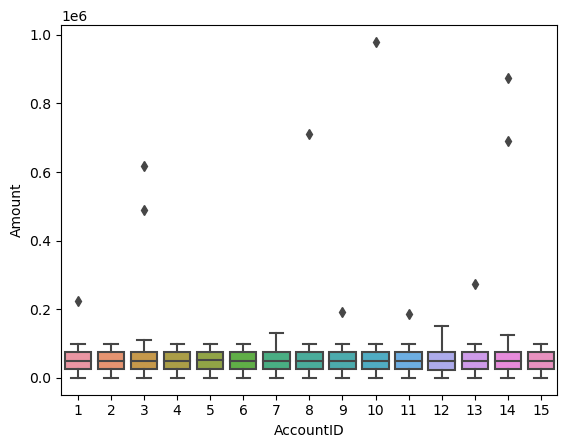

In [16]:
sns.boxplot(x='AccountID',y='Amount',data=df)

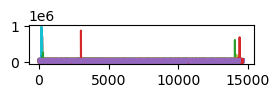

In [17]:
for i in account: 
    d=data1[data1['AccountID']==i]['Amount']
    #print(d.nunique())
    j=1
    plt.subplot(8,2,j)
    plt.plot(np.array(d))
    j+=1

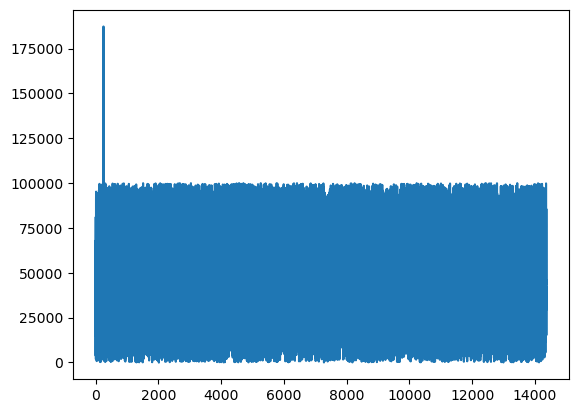

In [18]:

d=data1[data1['AccountID']=='ACC1']['Amount']
#print(d.nunique())
#plt.subplot(8,2,j)
plt.plot(np.array(d))

In [19]:
df['TransactionID'].nunique()

1999

In [20]:
df['Amount'].nunique()

214687

In [21]:
df['Merchant'].nunique()

10

In [22]:
df['Merchant'].value_counts()

Merchant
MerchantF    21924
MerchantG    21891
MerchantD    21820
MerchantB    21766
MerchantI    21752
MerchantA    21699
MerchantJ    21654
MerchantE    21543
MerchantH    21518
MerchantC    21393
Name: count, dtype: int64

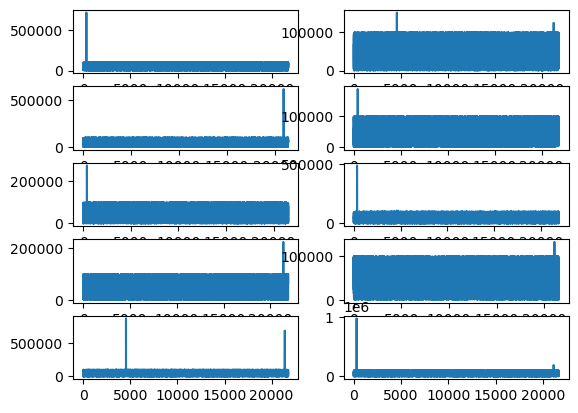

In [23]:
d=data1[data1['Merchant']=='MerchantA']['Amount']
#print(d.nunique())
plt.subplot(5,2,1)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantB']['Amount']
#print(d.nunique())
plt.subplot(5,2,2)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantC']['Amount']
#print(d.nunique())
plt.subplot(5,2,3)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantD']['Amount']
#print(d.nunique())
plt.subplot(5,2,4)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantE']['Amount']
#print(d.nunique())
plt.subplot(5,2,5)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantF']['Amount']
#print(d.nunique())
plt.subplot(5,2,6)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantG']['Amount']
#print(d.nunique())
plt.subplot(5,2,7)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantH']['Amount']
#print(d.nunique())
plt.subplot(5,2,8)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantI']['Amount']
#print(d.nunique())
plt.subplot(5,2,9)
plt.plot(np.array(d))

d=data1[data1['Merchant']=='MerchantJ']['Amount']
#print(d.nunique())
plt.subplot(5,2,10)
plt.plot(np.array(d))

plt.show()
#sns.boxplot(x=d)

In [24]:
merchant=list(df['Merchant'].unique())
print(merchant)
mer_l=[]
i=0
for j in merchant:
    i+=1
    mer_l.append(i)
print(mer_l)


['MerchantH', 'MerchantE', 'MerchantI', 'MerchantC', 'MerchantD', 'MerchantB', 'MerchantJ', 'MerchantA', 'MerchantG', 'MerchantF']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [25]:
df['Merchant'].replace(merchant,mer_l,inplace=True)

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\2155152691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merchant'].replace(merchant,mer_l,inplace=True)


<Axes: xlabel='Merchant', ylabel='count'>

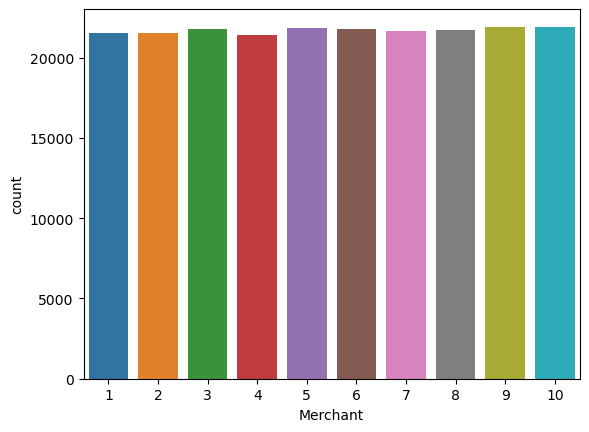

In [26]:
sns.countplot(x='Merchant',data=df)

<Axes: xlabel='Merchant', ylabel='Amount'>

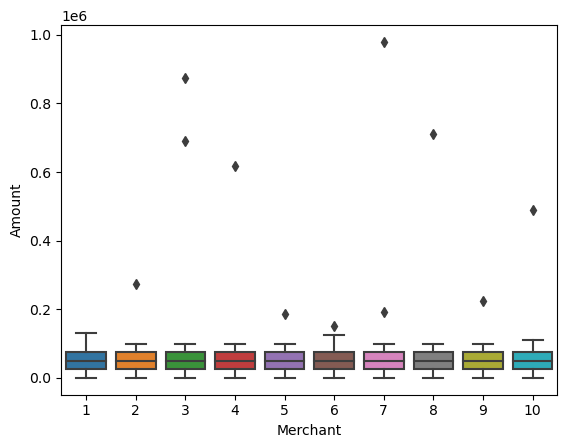

In [27]:
sns.boxplot(x='Merchant',y='Amount',data=df)

In [28]:
df['TransactionType'].nunique()

3

In [29]:
df['TransactionType'].value_counts()

TransactionType
Transfer      72793
Purchase      72235
Withdrawal    71932
Name: count, dtype: int64

<Axes: xlabel='TransactionType', ylabel='Amount'>

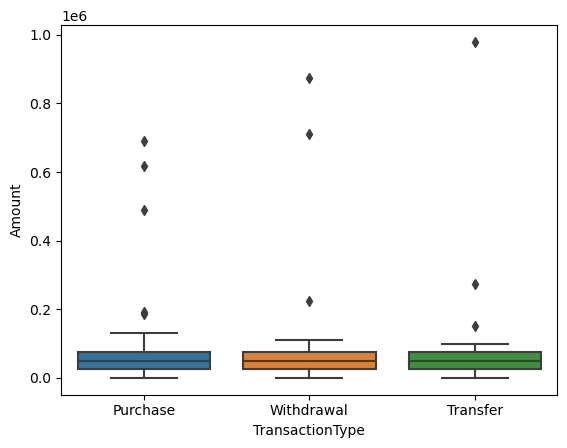

In [30]:
sns.boxplot(x='TransactionType',y='Amount',data=df)

<Axes: xlabel='TransactionType', ylabel='count'>

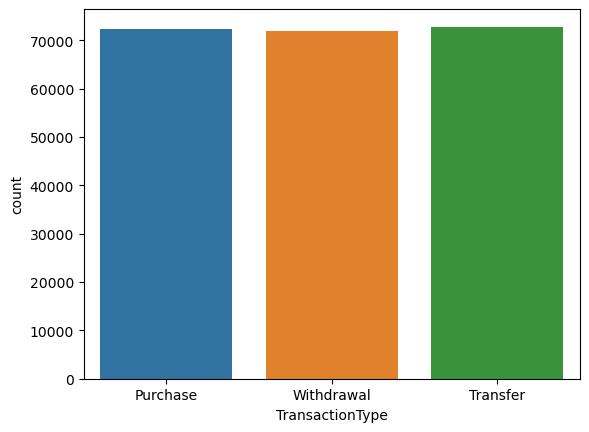

In [31]:
sns.countplot(x='TransactionType',data=df)

In [32]:
df['TransactionType'].replace(['Transfer','Purchase','Withdrawal'],[1,2,3],inplace=True)

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\2574785859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionType'].replace(['Transfer','Purchase','Withdrawal'],[1,2,3],inplace=True)


In [33]:
df['Location'].nunique()

5

In [34]:
df['Location'].unique()

array(['Tokyo', 'London', 'Los Angeles', 'San Francisco', 'New York'],
      dtype=object)

In [35]:
df['Location'].value_counts()

Location
San Francisco    43613
New York         43378
London           43343
Los Angeles      43335
Tokyo            43291
Name: count, dtype: int64

<Axes: xlabel='Location', ylabel='Amount'>

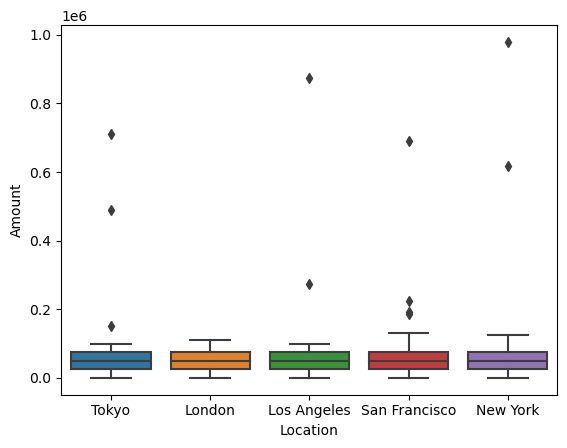

In [36]:
sns.boxplot(x='Location',y='Amount',data=df)

<Axes: xlabel='Location', ylabel='count'>

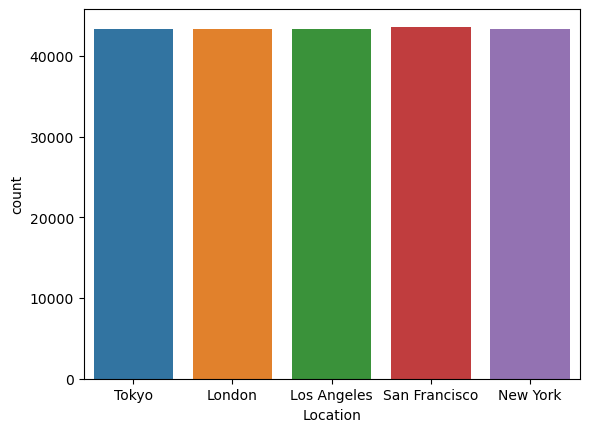

In [37]:
sns.countplot(x='Location',data=df)

In [38]:
df['Location'].replace(['San Francisco','New York','London','Los Angeles','Tokyo'],[1,2,3,4,5],inplace=True)

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\2914813418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'].replace(['San Francisco','New York','London','Los Angeles','Tokyo'],[1,2,3,4,5],inplace=True)


In [39]:
['Amount']

['Amount']

In [40]:
df['Timestamp'].nunique()

216960

In [41]:
df['Timestamp'][16800]

'13-01-2023 00:00'

In [42]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='mixed')

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\604855561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='mixed')


In [43]:
# Extracting relevant time features
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second

C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\4193549056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Timestamp'].dt.year
C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\4193549056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Timestamp'].dt.month
C:\Users\IITG\AppData\Local\Temp\ipykernel_14512\4193549056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [44]:
df.head(3)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,year,month,day,hour,minute,second
0,2023-01-01 08:00:00,TXN1127,1,95071.92,1,2,5,2023,1,1,8,0,0
1,2023-01-01 08:01:00,TXN1639,2,15607.89,1,2,3,2023,1,1,8,1,0
2,2023-01-01 08:02:00,TXN872,3,65092.34,2,3,3,2023,1,1,8,2,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Timestamp        216960 non-null  datetime64[ns]
 1   TransactionID    216960 non-null  object        
 2   AccountID        216960 non-null  int64         
 3   Amount           216960 non-null  float64       
 4   Merchant         216960 non-null  int64         
 5   TransactionType  216960 non-null  int64         
 6   Location         216960 non-null  int64         
 7   year             216960 non-null  int32         
 8   month            216960 non-null  int32         
 9   day              216960 non-null  int32         
 10  hour             216960 non-null  int32         
 11  minute           216960 non-null  int32         
 12  second           216960 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(6), int64(4), object(1)
memory usage: 2

In [46]:
#df[df['Amount']<1000]

In [47]:
data[data['Amount']>100000]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
2775,03-01-2023 06:15,TXN1049,ACC14,978942.26,MerchantJ,Transfer,New York
3448,03-01-2023 17:28,TXN827,ACC12,712076.97,MerchantA,Withdrawal,Tokyo
3453,03-01-2023 17:33,TXN1690,ACC8,489492.30,MerchantF,Purchase,Tokyo
4148,04-01-2023 05:08,TXN625,ACC1,187344.37,MerchantD,Purchase,San Francisco
4194,04-01-2023 05:54,TXN667,ACC3,272990.11,MerchantE,Transfer,Los Angeles
45099,01-02-2023 15:39,TXN1359,ACC11,151020.55,MerchantB,Transfer,Tokyo
45100,01-02-2023 15:40,TXN190,ACC5,873004.79,MerchantI,Withdrawal,Los Angeles
45108,01-02-2023 15:48,TXN1660,ACC8,109150.02,MerchantF,Withdrawal,London
211714,28-05-2023 08:34,TXN1920,ACC5,124103.08,MerchantB,Purchase,New York
211753,28-05-2023 09:13,TXN141,ACC4,223542.64,MerchantG,Withdrawal,San Francisco


In [48]:
df=df[df['Amount']<100000]
df=df[df['Amount']>1000]

In [49]:
df.describe()

,Timestamp,AccountID,Amount,Merchant,TransactionType,Location,year,month,day,hour,minute,second
count,214801,214801.000000,214801.000000,214801.000000,214801.000000,214801.000000,214801.0,214801.000000,214801.000000,214801.000000,214801.000000,214801.0
mean,2023-04-27 16:23:45.923529472,8.000168,50561.696817,5.516189,1.996127,2.996532,2023.0,4.411534,14.259491,11.516999,29.497488,0.0
min,2023-01-01 08:00:00,1.000000,1000.920000,1.000000,1.000000,1.000000,2023.0,1.000000,1.000000,0.000000,0.000000,0.0
25%,2023-02-22 00:18:00,4.000000,25818.190000,3.000000,1.000000,2.000000,2023.0,2.000000,4.000000,6.000000,14.000000,0.0
50%,2023-04-14 15:56:00,8.000000,50671.260000,6.000000,2.000000,3.000000,2023.0,4.000000,16.000000,12.000000,30.000000,0.0
75%,2023-05-29 08:04:00,12.000000,75331.120000,8.000000,3.000000,4.000000,2023.0,5.000000,23.000000,18.000000,44.000000,0.0
max,2023-12-05 23:59:00,15.000000,99998.810000,10.000000,3.000000,5.000000,2023.0,12.000000,31.000000,23.000000,59.000000,0.0
std,NaN,4.317706,28569.989741,2.873780,0.816687,1.414899,0.0,2.975747,10.039418,6.918739,17.319404,0.0


<Axes: >

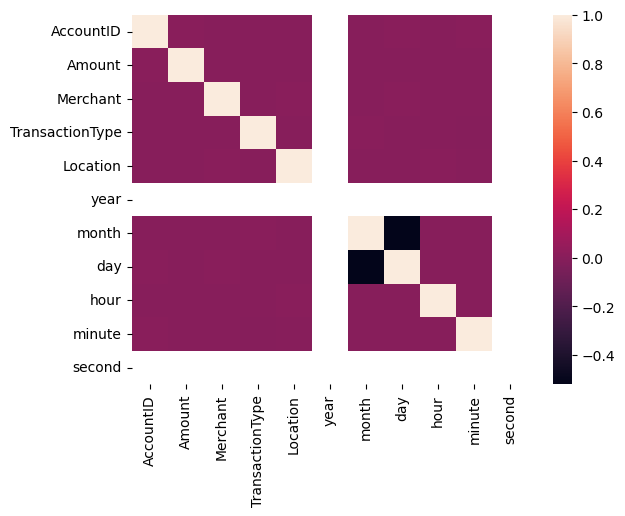

In [50]:
sns.heatmap(df.iloc[:,2:14].corr())

### Predicting the spend for all Transaction Types for the month of June

### a. RandomForestRegressor

In [51]:
# Training and testing data frame
dt=df.iloc[:,2:]

train_data = dt[dt['month'] != 6]

test_data = dt[dt['month'] == 6]
y_test=np.array(dt[dt['month'] == 6]['Amount'])

#Features selection
features =['AccountID','Merchant','TransactionType','Location','month','day','hour','minute']

#defining target variable
target = 'Amount'

#model selection and training the model
model = RandomForestRegressor(500)
model.fit(train_data[features], train_data[target])

predicted_spend = model.predict(test_data[features])



In [52]:
y_test=np.array(dt[dt['month'] == 6]['Amount'])
print('mean square error : ',mean_squared_error(predicted_spend,y_test))

mean square error :  848554202.9247544


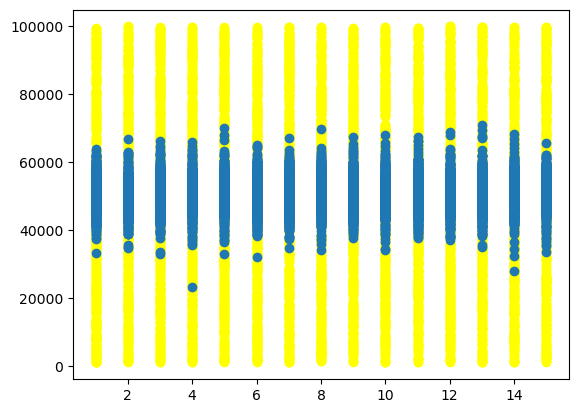

In [53]:
plt.scatter(np.array(test_data['AccountID']),np.array(df[df['month']==6]['Amount']),color='yellow')
plt.scatter(np.array(test_data['AccountID']),predicted_spend)
plt.show()

### b. Polynomial linear regression

In [54]:


y_train_=df[df['month']!=6]['Amount']
y_train=np.array(y_train_)


a=df[df['month']!=6]['AccountID']
b=df[df['month']!=6].iloc[:,4:7]
c=df[df['month']!=6].iloc[:,8:12]
x_train_=pd.concat([a,b,c],axis=1)
x_train=np.array(x_train_)

y_test_=df[df['month']==6]['Amount']
y_test=np.array(y_test_)

d=df[df['month']==6]['AccountID']
e=df[df['month']==6].iloc[:,4:7]
f=df[df['month']==6].iloc[:,8:12]
x_test_=pd.concat([d,e,f],axis=1)
x_test=np.array(x_test_)

In [55]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf

pr=pf(degree=6) 


x_pol_train=pr.fit_transform(x_train)
x_pol_test=pr.fit_transform(x_test)


poly_reg_algorithm=lr()
poly_reg_algorithm.fit(x_pol_train,y_train)

predicted_spend=poly_reg_algorithm.predict(x_pol_test)

 


In [56]:
#mean squared error
print('mean square error = ',mean_squared_error(y_test,predicted_spend))

mean square error =  837421394.6916173


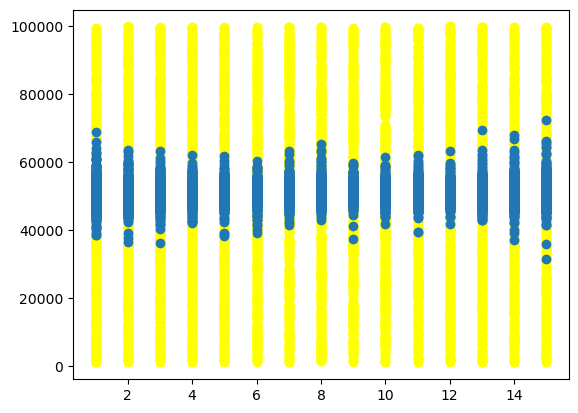

In [57]:
plt.scatter(np.array(x_test_['AccountID']),np.array(df[df['month']==6]['Amount']),color='yellow')
plt.scatter(np.array(x_test_['AccountID']),predicted_spend)
plt.show()


### c. SVM

In [58]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_)
x_test=scaler.fit_transform(x_test_)

In [60]:

from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

predict_spend = model.predict(x_test)


In [61]:
#mean squared error
print('mean square error = ',mean_squared_error(y_test,predict_spend))

mean square error =  821032906.5527359


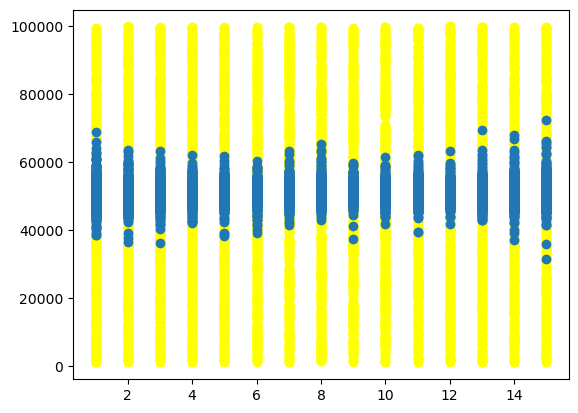

In [62]:
plt.scatter(np.array(x_test_['AccountID']),np.array(df[df['month']==6]['Amount']),color='yellow')
plt.scatter(np.array(x_test_['AccountID']),predicted_spend)
plt.show()
